Rickord, Jake JJ
2021-7-14
Data Mining
Final Project

Isolation. Monotony. Sickness and Death. Our previous year can be summed up in those 3 succinct descriptions for the majority of us. With the rapid spread and malevolence of COVID-19, we've likely suffered from one of those elements shown above. As we peak into the horizon and continue to meld back into a world that looks akin to the one we left some short 12-15 months ago, I feel it's important to do a post-mortem on our efforts to stop the virus. Through this analysis, perhaps we can pull actionable insights as we move forward and face future challenges such as the rising threat of the Delta variant, as well as other crucibles we may encounter in the coming years. In our disposal, we have access to a list of all 50 states with data spanning death totals, recovered totals, testing done, state population, and other indicators we can use to investigate the effect that state restrictions have had on stemming the spread. 

With how divisive the political opinions have been on either side of the aisle have been regarding the virus, our goal from this analysis is not to be a breakdown of different factors such as false positive testing nor an investigation into whether deaths were solely from covid or not, rather, we aim to simply show that based on statistical values we have from the dataset available, in conjunction with the general restrictions employed by each state, whether we can say that the data supports that restrictions aided in limiting the number of cases (with respect to population) of the coronavirus.

Let's begin this search for answers by first visualizing our dataset, and adding in any feature variables we'll need:

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
#open dataset
df=pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Data PrepMining\USA Covid Data.csv')
print(df.head)

<bound method NDFrame.head of              State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358              NaN           NaN   
1           Alaska        68674           370          66087.0        2217.0   
2          Arizona       898283         18004         867042.0       13237.0   
3         Arkansas       353095          5933         341896.0        5266.0   
4       California      3828483         63758        2077558.0     1687167.0   
5         Colorado       560419          7056         467669.0       85694.0   
6      Connecticut       349743          8278         339469.0        1996.0   
7         Delaware       109900          1695         107493.0         712.0   
8          Florida      2382980         37985        2215966.0      129029.0   
9          Georgia      1137560         21467        1056403.0       59690.0   
10          Hawaii        38121           518              NaN           NaN   
11        

In [4]:
#Looks like that read in great. Let's see those dtypes of each column as well as any NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         50 non-null     object 
 1   Total Cases                   50 non-null     int64  
 2   Total Deaths                  50 non-null     int64  
 3   Total Recovered               44 non-null     float64
 4   Active Cases                  44 non-null     float64
 5   Total Cases/1 mil population  50 non-null     int64  
 6   Death/1 mil population        50 non-null     float64
 7   Total Tests                   50 non-null     int64  
 8   Tests/1 mil population        50 non-null     float64
 9   Population                    50 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 4.0+ KB


Looks like we have 6 states that don't have data for Total Recovered & Active Cases. We can tackle these pieces in a few different ways. One would be to drop these na rows. Doing so would remove us some states, which doesn't seem to make a lot of sense given the rest of the data is still available for them. I think the most logical option would be to try and estimate these values given their total case value. It may not be perfect, but likely it's the best we can do here. 

That being said, in order to get an accurate estimate for percent recovered, it looks like we'll need to find percentage of those values for each state.

In [5]:
df['Percent Recovered']=(df['Total Recovered'] / df['Total Cases'])
print(df)

             State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358              NaN           NaN   
1           Alaska        68674           370          66087.0        2217.0   
2          Arizona       898283         18004         867042.0       13237.0   
3         Arkansas       353095          5933         341896.0        5266.0   
4       California      3828483         63758        2077558.0     1687167.0   
5         Colorado       560419          7056         467669.0       85694.0   
6      Connecticut       349743          8278         339469.0        1996.0   
7         Delaware       109900          1695         107493.0         712.0   
8          Florida      2382980         37985        2215966.0      129029.0   
9          Georgia      1137560         21467        1056403.0       59690.0   
10          Hawaii        38121           518              NaN           NaN   
11           Idaho       195552         

Definitely a few oddballs in there that seem to be reporting active cases oddly in comparison to others reporting as recovered. Good to keep in mind here as we calculate the average of that column.

In [55]:
avgpercrecov=df['Percent Recovered'].median()
avgpercrecov

0.9618944203258244

Given this mean, we can now apply this to all rows showing as NaN by multiplying this percentage by the state's total cases.

In [7]:
df['Total Recovered'].fillna(value=(df['Total Cases'] * avgpercrecov), inplace=True)
df['Total Recovered'] = df['Total Recovered'].astype('int64')
df['Percent Recovered'].fillna(avgpercrecov, inplace=True)
print(df.head)

<bound method NDFrame.head of              State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358           472230           NaN   
1           Alaska        68674           370            66087        2217.0   
2          Arizona       898283         18004           867042       13237.0   
3         Arkansas       353095          5933           341896        5266.0   
4       California      3828483         63758          2077558     1687167.0   
5         Colorado       560419          7056           467669       85694.0   
6      Connecticut       349743          8278           339469        1996.0   
7         Delaware       109900          1695           107493         712.0   
8          Florida      2382980         37985          2215966      129029.0   
9          Georgia      1137560         21467          1056403       59690.0   
10          Hawaii        38121           518            32653           NaN   
11        

Alright, now finding the Active Cases should be relatively easy, as this column, total deaths, and total recovered should account for all cases. So let's solve for that next.

In [8]:
df['Active Cases'].fillna(value=df['Total Cases']-df['Total Deaths']-df['Total Recovered'], inplace=True)
print(df.head())

        State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0     Alabama       551298         11358           472230       67710.0   
1      Alaska        68674           370            66087        2217.0   
2     Arizona       898283         18004           867042       13237.0   
3    Arkansas       353095          5933           341896        5266.0   
4  California      3828483         63758          2077558     1687167.0   

   Total Cases/1 mil population  Death/1 mil population  Total Tests  \
0                        112437                  2316.0      2830286   
1                         93875                   506.0      2395221   
2                        123412                  2474.0      5126795   
3                        117004                  1966.0      3808827   
4                         96894                  1614.0     70392011   

   Tests/1 mil population  Population  Percent Recovered  
0                577234.0     4903185           0.856580 

Let's check and make sure that worked out right

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         50 non-null     object 
 1   Total Cases                   50 non-null     int64  
 2   Total Deaths                  50 non-null     int64  
 3   Total Recovered               50 non-null     int64  
 4   Active Cases                  50 non-null     float64
 5   Total Cases/1 mil population  50 non-null     int64  
 6   Death/1 mil population        50 non-null     float64
 7   Total Tests                   50 non-null     int64  
 8   Tests/1 mil population        50 non-null     float64
 9   Population                    50 non-null     int64  
 10  Percent Recovered             50 non-null     float64
dtypes: float64(4), int64(6), object(1)
memory usage: 4.4+ KB
None


We're in the money now! Alright now let's read in a few add-ins for features of interest. The first column we'll add is data regarding state restrictions pulled from the Wall Street Journal:
https://www.wsj.com/articles/a-state-by-state-guide-to-coronavirus-lockdowns-11584749351
We've condensed the map down to a csv file for ease of import.

In [10]:
srs=pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Data PrepMining\StateRestrictions.txt', sep='\n')
srs

,State Restrictions
0,"Lifted many restrictions, or never enacted maj..."
1,"Lifted many restrictions, or never enacted maj..."
2,"Lifted many restrictions, or never enacted maj..."
3,"Lifted many restrictions, or never enacted maj..."
4,Some restrictions
5,"Lifted many restrictions, or never enacted maj..."
6,"Lifted many restrictions, or never enacted maj..."
7,Comprehensive restrictions on business and travel
8,"Lifted many restrictions, or never enacted maj..."
9,"Lifted many restrictions, or never enacted maj..."


In [11]:
df['State Restrictions']=srs
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         50 non-null     object 
 1   Total Cases                   50 non-null     int64  
 2   Total Deaths                  50 non-null     int64  
 3   Total Recovered               50 non-null     int64  
 4   Active Cases                  50 non-null     float64
 5   Total Cases/1 mil population  50 non-null     int64  
 6   Death/1 mil population        50 non-null     float64
 7   Total Tests                   50 non-null     int64  
 8   Tests/1 mil population        50 non-null     float64
 9   Population                    50 non-null     int64  
 10  Percent Recovered             50 non-null     float64
 11  State Restrictions            50 non-null     object 
dtypes: float64(4), int64(6), object(2)
memory usage: 4.8+ KB
None


Awesome, we got that column in there. Also want to grab average age of population for each state from this wiki page:
https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age. Let's do that next.

In [12]:
import requests
from bs4 import BeautifulSoup

In [13]:
#request response from server
url='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age'
table='wikitable sortable jquery-tablesorter'
response=requests.get(url)
#render that response and find our table
soup=BeautifulSoup(response.text, 'html.parser')
tableinfo=soup.find('table',{'class':"wikitable"})
#send over to pandas df
medage=pd.read_html(str(tableinfo))
# convert list to dataframe
medage=pd.DataFrame(medage[0])
print(medage)
print(medage.shape)

   Rank State,federal district,or territory  \
0     1                               Maine   
1     2                      Puerto Rico[2]   
2     3                       New Hampshire   
3     4                             Vermont   
4     5                       West Virginia   
5     6                             Florida   
6     7              U.S. Virgin Islands[2]   
7     8                         Connecticut   
8     8                            Delaware   
9    10                        Pennsylvania   
10   11                        Rhode Island   
11   11                          New Jersey   
12   11                             Montana   
13   14                            Michigan   
14   14                      South Carolina   
15   16                           Wisconsin   
16   17                       Massachusetts   
17   17                              Oregon   
18   17                              Hawaii   
19   20                                Ohio   
20   21      

Woah, looks like we have 57 entries here! We have some more territories listed here, so let's eliminate those we don't have in our first dataframe as we don't have any of those in our main information dataframe.

In [14]:
medage=medage.drop([6, 10, 35, 52, 53, 55, 56])

In [15]:
medage.sort_values(by='State,federal district,or territory', inplace=True)
medage

,Rank,"State,federal district,or territory",Median age in years (Total Population)[1][2][note 2]
20,21,Alabama,39.4
51,50,Alaska,35.0
36,36,Arizona,38.2
29,30,Arkansas,38.5
45,45,California,37.0
42,42,Colorado,37.1
7,8,Connecticut,41.1
8,8,Delaware,41.1
5,6,Florida,42.5
43,42,Georgia,37.1


In [16]:
df['Median Age of State']=medage['Median age in years (Total Population)[1][2][note 2]'].values
df.head

<bound method NDFrame.head of              State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358           472230       67710.0   
1           Alaska        68674           370            66087        2217.0   
2          Arizona       898283         18004           867042       13237.0   
3         Arkansas       353095          5933           341896        5266.0   
4       California      3828483         63758          2077558     1687167.0   
5         Colorado       560419          7056           467669       85694.0   
6      Connecticut       349743          8278           339469        1996.0   
7         Delaware       109900          1695           107493         712.0   
8          Florida      2382980         37985          2215966      129029.0   
9          Georgia      1137560         21467          1056403       59690.0   
10          Hawaii        38121           518            32653        4950.0   
11        

On target there now. Up next is life expectancy for all states

In [17]:
#request response from server
url='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_life_expectancy'
table='wikitable sortable jquery-tablesorter'
response=requests.get(url)
#render that response and find our table
soup=BeautifulSoup(response.text, 'html.parser')
tableinfo=soup.find('table',{'class':"wikitable"})
#send over to pandas df
le=pd.read_html(str(tableinfo))
# convert list to dataframe
le=pd.DataFrame(le[0])
print(le)

   Rank               State/Territory Life Expectancy 2018[3]  \
0    1.                        Hawaii                    82.3   
1    2.                    California                    81.7   
2    3.                      New York                    81.4   
3    4.                     Minnesota                    80.9   
4    5.                   Connecticut                    80.9   
5    6.                 Massachusetts                    80.6   
6     7                      Colorado                    80.6   
7    8.                    New Jersey                    80.5   
8    9.                    Washington                    80.4   
9   10.                       Florida                    80.2   
10  11.                          Utah                    80.1   
11  12.                       Arizona                    80.0   
12  13.                        Oregon                    79.9   
13    -                       Guam[4]                    79.9   
14  14.                  

In [18]:
le=le.drop([13, 14, 20, 29, 33, 47, 55])
le.sort_values(by='State/Territory', inplace=True)
df['Life Expectancy by State']=le['Life Expectancy 2018[3]'].values
print(df.head)

<bound method NDFrame.head of              State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358           472230       67710.0   
1           Alaska        68674           370            66087        2217.0   
2          Arizona       898283         18004           867042       13237.0   
3         Arkansas       353095          5933           341896        5266.0   
4       California      3828483         63758          2077558     1687167.0   
5         Colorado       560419          7056           467669       85694.0   
6      Connecticut       349743          8278           339469        1996.0   
7         Delaware       109900          1695           107493         712.0   
8          Florida      2382980         37985          2215966      129029.0   
9          Georgia      1137560         21467          1056403       59690.0   
10          Hawaii        38121           518            32653        4950.0   
11        

Looking great there! Now we run our last classifier into the dataset, which is political affiliation of 2020 Election. Then we should be all set!

In [19]:
pa=pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Data PrepMining\Political Affils.txt', sep='\n', header=None)
pa.head

<bound method NDFrame.head of                 0
0    Republican  
1    Republican  
2      Democratic
3    Republican  
4     Republican 
5    Democratic  
6    Democratic  
7   Democratic   
8    Democratic  
9    Republican  
10  Republican   
11  Democratic   
12  Republican   
13  Democratic   
14  Republican   
15  Republican   
16  Democratic   
17  Democratic   
18   Democratic  
19     Democratic
20    Republican 
21     Republican
22     Democratic
23     Democratic
24    Republican 
25    Republican 
26     Republican
27     Republican
28   Democratic  
29    Republican 
30     Democratic
31     Democratic
32     Democratic
33     Democratic
34     Republican
35     Republican
36     Republican
37     Democratic
38     Democratic
39     Republican
40     Republican
41     Republican
42     Republican
43     Republican
44    Republican 
45     Democratic
46     Democratic
47     Republican
48     Democratic
49     Republican>

In [20]:
pa[0]=pa[0].str.strip()

In [21]:
df['Governor Affiliation']=pa[0].values
print(df.head)

<bound method NDFrame.head of              State  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0          Alabama       551298         11358           472230       67710.0   
1           Alaska        68674           370            66087        2217.0   
2          Arizona       898283         18004           867042       13237.0   
3         Arkansas       353095          5933           341896        5266.0   
4       California      3828483         63758          2077558     1687167.0   
5         Colorado       560419          7056           467669       85694.0   
6      Connecticut       349743          8278           339469        1996.0   
7         Delaware       109900          1695           107493         712.0   
8          Florida      2382980         37985          2215966      129029.0   
9          Georgia      1137560         21467          1056403       59690.0   
10          Hawaii        38121           518            32653        4950.0   
11        

Now we're rolling with a complete dataset. Time to start manipulating it! Let's take a look again at our final dtypes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         50 non-null     object 
 1   Total Cases                   50 non-null     int64  
 2   Total Deaths                  50 non-null     int64  
 3   Total Recovered               50 non-null     int64  
 4   Active Cases                  50 non-null     float64
 5   Total Cases/1 mil population  50 non-null     int64  
 6   Death/1 mil population        50 non-null     float64
 7   Total Tests                   50 non-null     int64  
 8   Tests/1 mil population        50 non-null     float64
 9   Population                    50 non-null     int64  
 10  Percent Recovered             50 non-null     float64
 11  State Restrictions            50 non-null     object 
 12  Median Age of State           50 non-null     float64
 13  Life Ex

Let's see what features could have had an impact on total cases. Our primary features would be the Restrictions, however we can test party affiliation (we'd assume this would go hand-in-hand with restrictions), median age and life expectancy of states to see any confounding factors here.

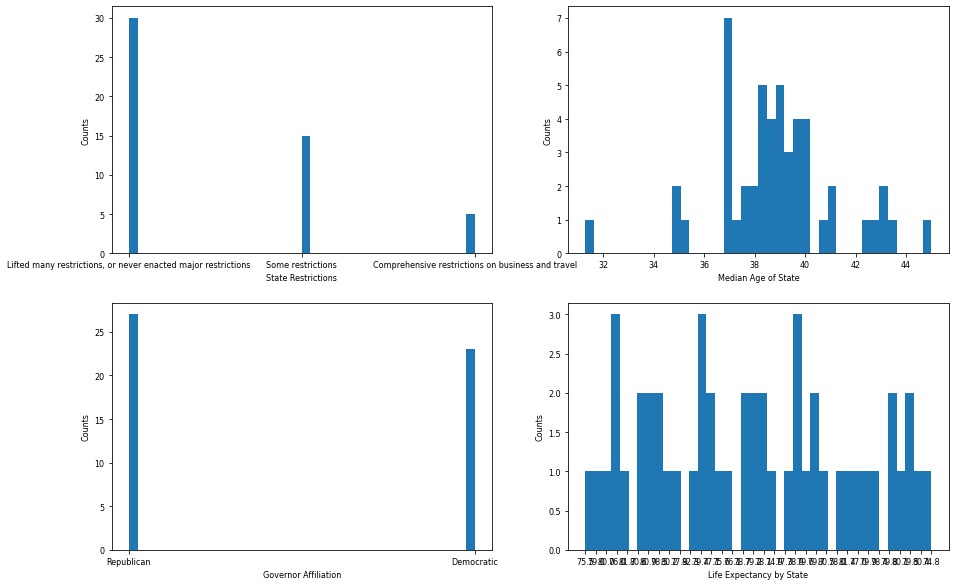

In [23]:
plt.rcParams['figure.figsize'] = (15, 10)

#Axes fix
fig, axes = plt.subplots(nrows=2, ncols=2)
num_features=['State Restrictions', 'Median Age of State', 'Governor Affiliation', 'Life Expectancy by State']
xaxes=num_features
yaxes=['Counts', 'Counts', 'Counts', 'Counts']

#Draw Histograms
axes=axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=8)
    ax.set_ylabel(yaxes[idx], fontsize=8)
    ax.tick_params(axis='both', labelsize=8)
plt.show()

From our graph of features, we can see a few observations:
1. Looks like we can see a good amount of comparisons from no restrictions against some restrictions, though comprehensive restrictions has a much smaller sample size.
2. Median age looks well distributed (though looks like there's possibly an outlier for a state short of 32. We'll look at that
3. Republican vs democrat looks well distributed
4. Life Expectancy also looks well distributed

In [24]:
df.sort_values(by='Median Age of State')

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Death/1 mil population,Total Tests,Tests/1 mil population,Population,Percent Recovered,State Restrictions,Median Age of State,Life Expectancy by State,Governor Affiliation
43,Utah,417653,2387,407664,7602.0,130274,745.0,5141040,1603589.0,3205958,0.976083,"Lifted many restrictions, or never enacted maj...",31.3,80.1,Republican
1,Alaska,68674,370,66087,2217.0,93875,506.0,2395221,3274195.0,731545,0.962329,"Lifted many restrictions, or never enacted maj...",35.0,79.0,Republican
42,Texas,3010445,52722,2903306,54417.0,103823,1818.0,32192208,1110234.0,28995881,0.964411,"Lifted many restrictions, or never enacted maj...",35.0,79.2,Republican
33,North Dakota,110779,1528,109127,124.0,145367,2005.0,447733,587528.0,762062,0.985087,"Lifted many restrictions, or never enacted maj...",35.3,79.7,Democratic
26,Nebraska,224873,2262,192621,29990.0,116249,1169.0,3056982,1580319.0,1934408,0.856580,"Lifted many restrictions, or never enacted maj...",36.8,79.6,Republican
35,Oklahoma,459675,7406,449960,2309.0,116168,1872.0,4040035,1020992.0,3956971,0.978866,"Lifted many restrictions, or never enacted maj...",36.9,76.0,Republican
11,Idaho,195552,2162,115460,77930.0,109426,1210.0,1413139,790760.0,1787065,0.590431,"Lifted many restrictions, or never enacted maj...",36.9,79.4,Democratic
4,California,3828483,63758,2077558,1687167.0,96894,1614.0,70392011,1781525.0,39512223,0.542658,Some restrictions,37.0,81.7,Republican
5,Colorado,560419,7056,467669,85694.0,97316,1225.0,3190081,553955.0,5758736,0.834499,"Lifted many restrictions, or never enacted maj...",37.1,80.6,Democratic
15,Kansas,319586,5166,309373,5047.0,109698,1773.0,1455337,499547.0,2913314,0.968043,"Lifted many restrictions, or never enacted maj...",37.1,78.5,Republican


Good for you Utah, looks legitimate! Let's investigate impact on case amount with respect to population for each feature.

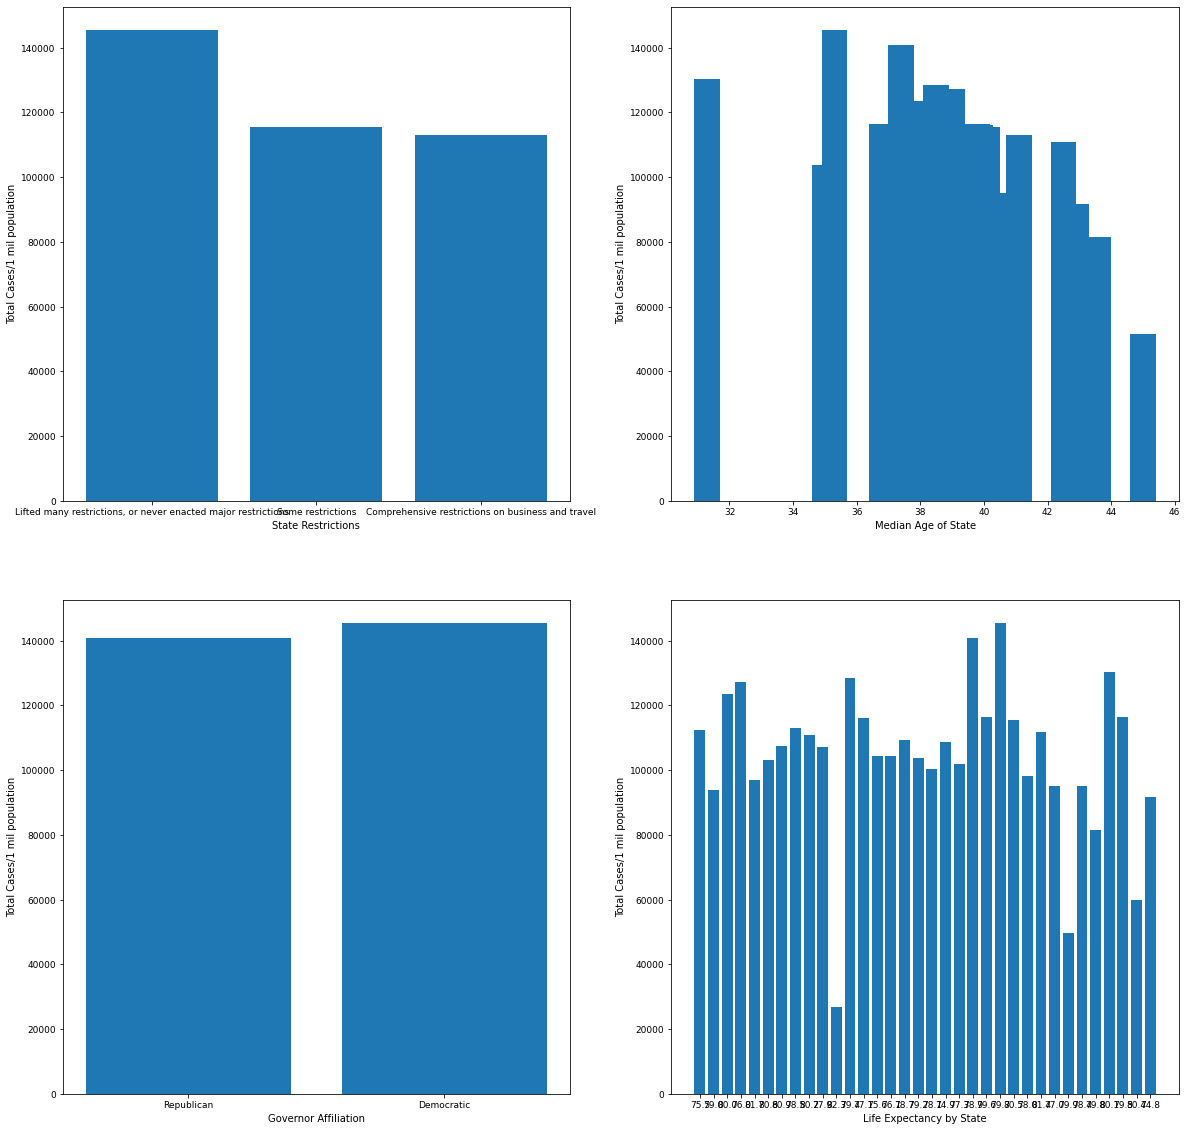

In [25]:
plt.rcParams['figure.figsize'] = (20, 20)

#Axes fix
fig, axes = plt.subplots(nrows=2, ncols=2)
num_features=['State Restrictions', 'Median Age of State', 'Governor Affiliation', 'Life Expectancy by State']
xaxes=num_features
yaxes=['Total Cases/1 mil population', 'Total Cases/1 mil population', 'Total Cases/1 mil population', 'Total Cases/1 mil population']

#Draw Bars
axes=axes.ravel()
for idx, ax in enumerate(axes):
    ax.bar(df[num_features[idx]].dropna(), df[yaxes[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=10)
    ax.set_ylabel(yaxes[idx], fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
plt.show()

Examining these graphs for items that stand out in comparison to our histograms, we find that most are in-line with those initial graphs. One interesting point may be to see that while no restrictions looks to have had more cases, some restrictions vs heavy restrictions seems to not have had much effect on lowering their respective cases. Another piece of interest is the political affiliations, which seem to show that regardless of governor political affiliation (which one might have tied to restriction level), seemed to have little effect. In fact, it looks like despite having less democratic governors, there might actually be more cases per population in those areas. This might be offset by testing levels, but still a highlightable point. 

Other than those more obvious ones, the life expectancy and median state age seemed to have little disparity between their total case charts and their distributions. One might have expected that if median age was higher, than that would mean more elderly population would be affected due to slowed immune systems possibly, however if anything, it looks like those skewed towards younger generations were more heavily infected.

That being said, we can do a quick diversion into the death rate here to see if expectations there are in accordance with what would be expected: more elderly population to be infected may mean higher death rates.

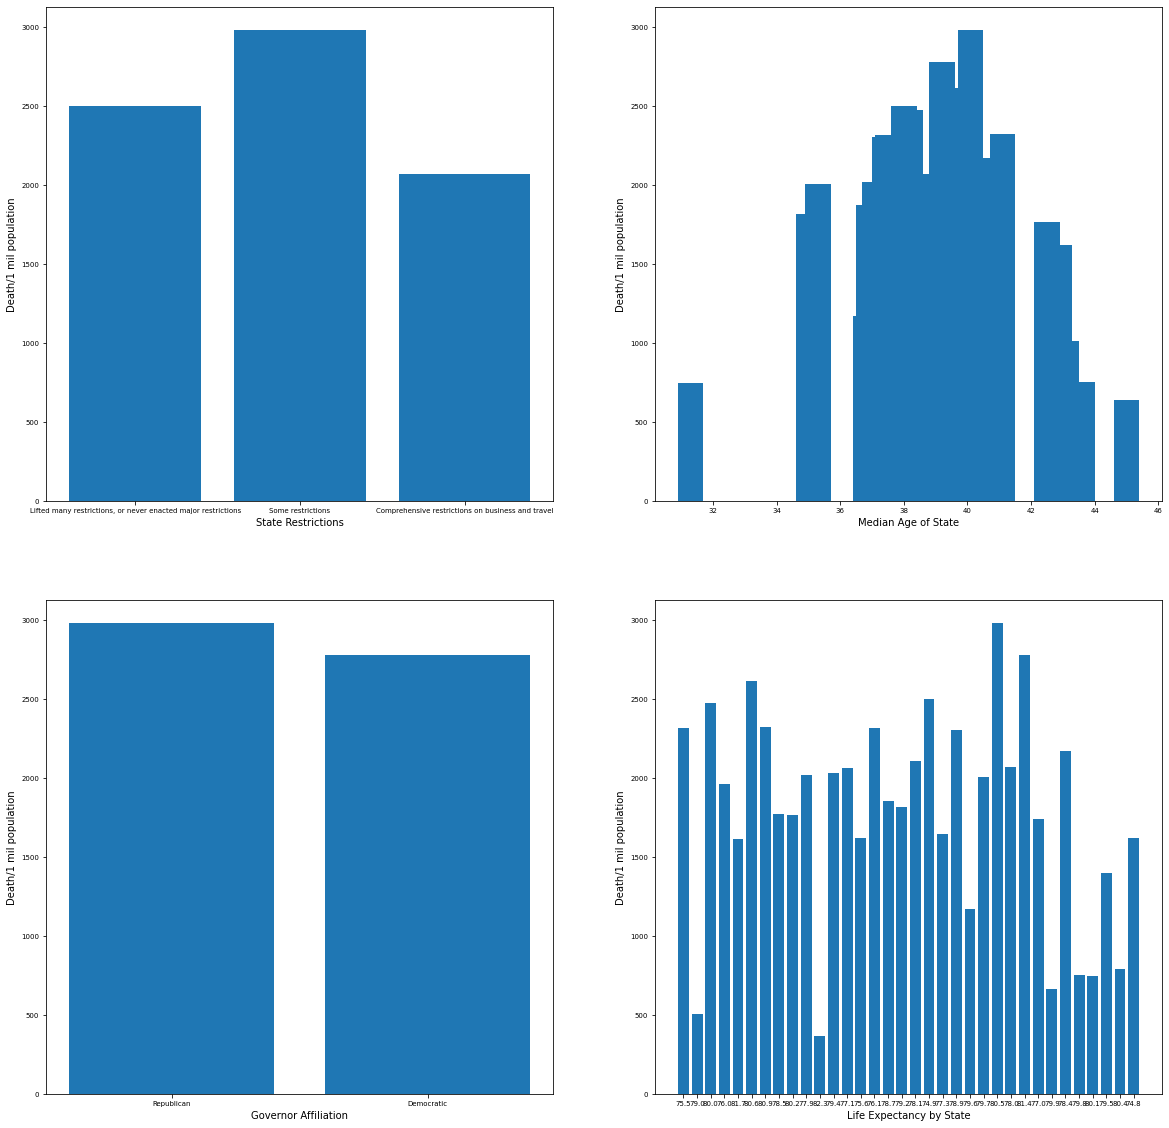

In [26]:
plt.rcParams['figure.figsize'] = (20, 20)

#Axes fix
fig, axes = plt.subplots(nrows=2, ncols=2)
num_features=['State Restrictions', 'Median Age of State', 'Governor Affiliation', 'Life Expectancy by State']
xaxes=num_features
yaxes=['Death/1 mil population', 'Death/1 mil population', 'Death/1 mil population', 'Death/1 mil population']

#Draw Bars
axes=axes.ravel()
for idx, ax in enumerate(axes):
    ax.bar(df[num_features[idx]].dropna(), df[yaxes[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=10)
    ax.set_ylabel(yaxes[idx], fontsize=10)
    ax.tick_params(axis='both', labelsize=7)
plt.show()

Lots of interesting insights here. Let's go from left to right here. Despite being less common than states with no restrictions, states with some restrictions had a higher death/1 million pop. Looks like peak for deaths/1 mill did indeed move further towards older age states on med age chart, however it didn't move as far as I would've thought. For partisanship, it looks like while democratic governors may have had more cases, republican governors dealt with more deaths/1 mill. Lastly, the life expectancy chart seems to have little to do again here, and visually seems like the least impactful of the feature vectors.

Let's throw one more together to see recovery rates versus these parameters of independent variables.

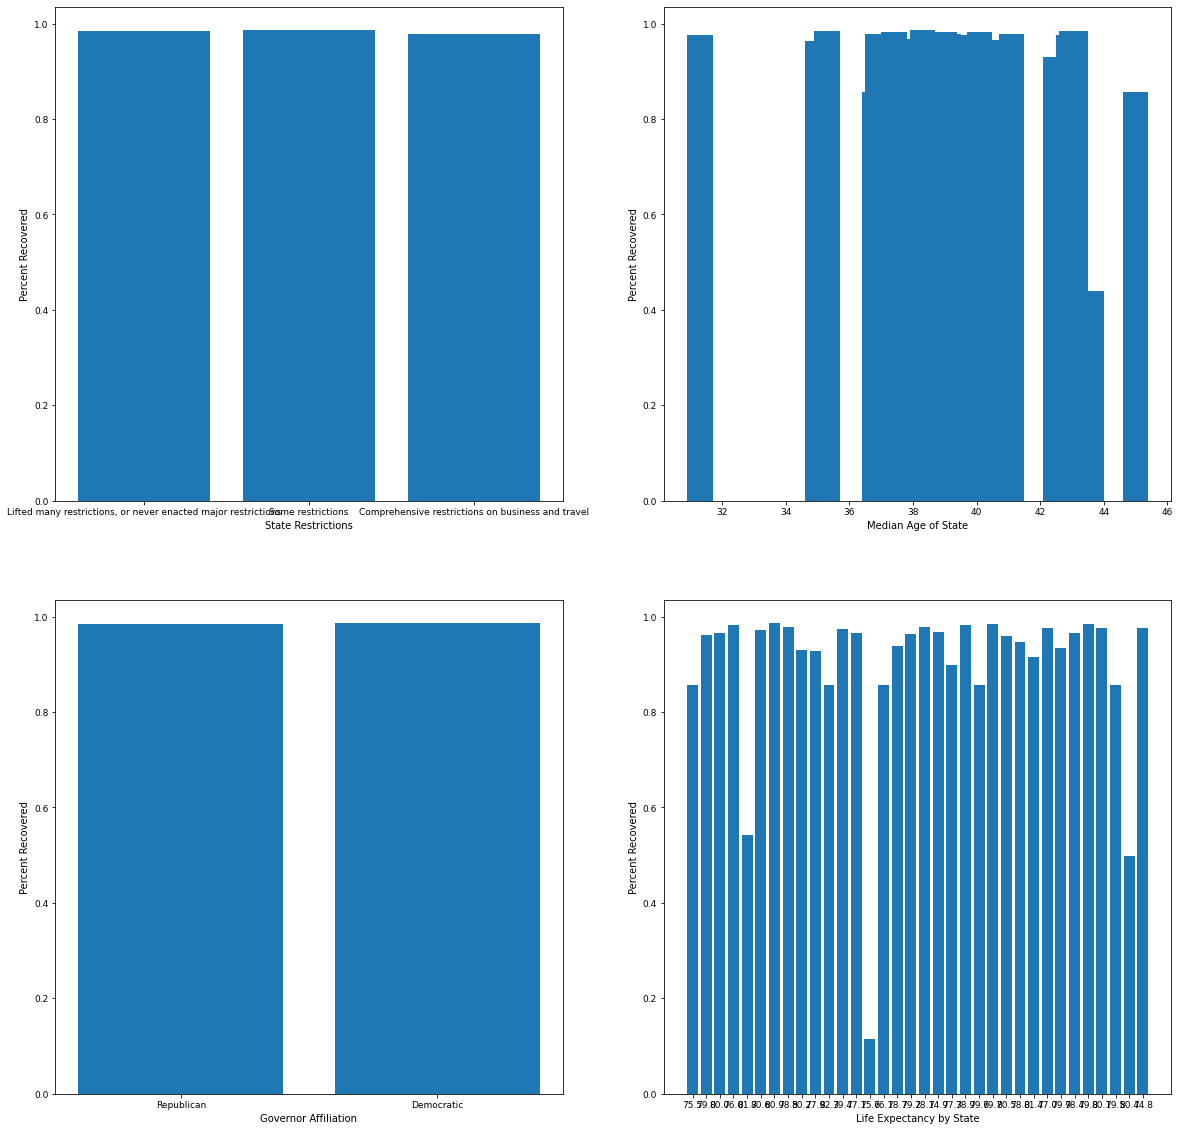

In [27]:
plt.rcParams['figure.figsize'] = (20, 20)

#Axes fix
fig, axes = plt.subplots(nrows=2, ncols=2)
num_features=['State Restrictions', 'Median Age of State', 'Governor Affiliation', 'Life Expectancy by State']
xaxes=num_features
yaxes=['Percent Recovered', 'Percent Recovered', 'Percent Recovered', 'Percent Recovered']

#Draw Bars
axes=axes.ravel()
for idx, ax in enumerate(axes):
    ax.bar(df[num_features[idx]].dropna(), df[yaxes[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=10)
    ax.set_ylabel('Percent Recovered', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
plt.show()

Good news here is that on a percentage basis, it looks like the percent of those infected were all near a similar, high, recovered rate with exception of those few oddballs we saw earlier that listed decent numbers of active cases instead of recovered. 

Overall from our EDA-like graph analyses, we can see that the least influential it would seem would be the life expectancy. Usually low life expectancy is tied to harsh conditions, lower economic standing, and/or poor access to healthcare. However, it seems to be fairly on point with it's own histographic distribution. On the other hand, restriction policies did seem to have the highest impact on the amount of cases/population when compared to no restrictions, though it would seem that some restrictions versus high restrictions seem to have little difference in their impact. 

<font size="5">Milestone 2</font>

Based on our design from Milestone 1, we'd assume that of the features we've presented, life expectancy seems to be the least impactful of the features. Let's back that up statistically, and see if we're able to remove that feature or any others that have little impact on the total case numbers. To accomplish this, we will check the pearson Ranking here, checking on the covariance between the quantitative variables, then we'll check correlation variables against case amounts.

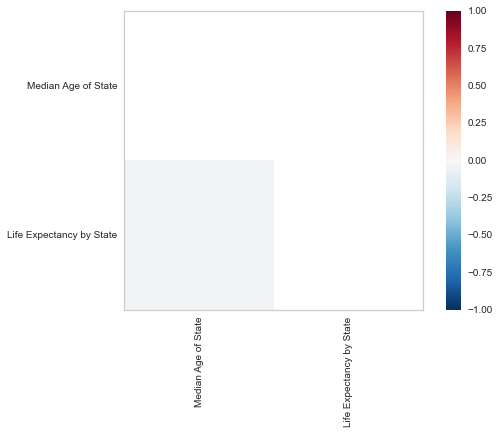

In [28]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visualization of the correlation
from yellowbrick.features import Rank2D

#Grab numeric features
num_features=['Median Age of State','Life Expectancy by State']
df['Life Expectancy by State']=df['Life Expectancy by State'].astype(float)

# extract the numpy arrays from the data frame
X = df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()

Very little to pull from that piece there. Thought there could've been a bit more similarities than what showed up between those two. Let's check for correlation charts.

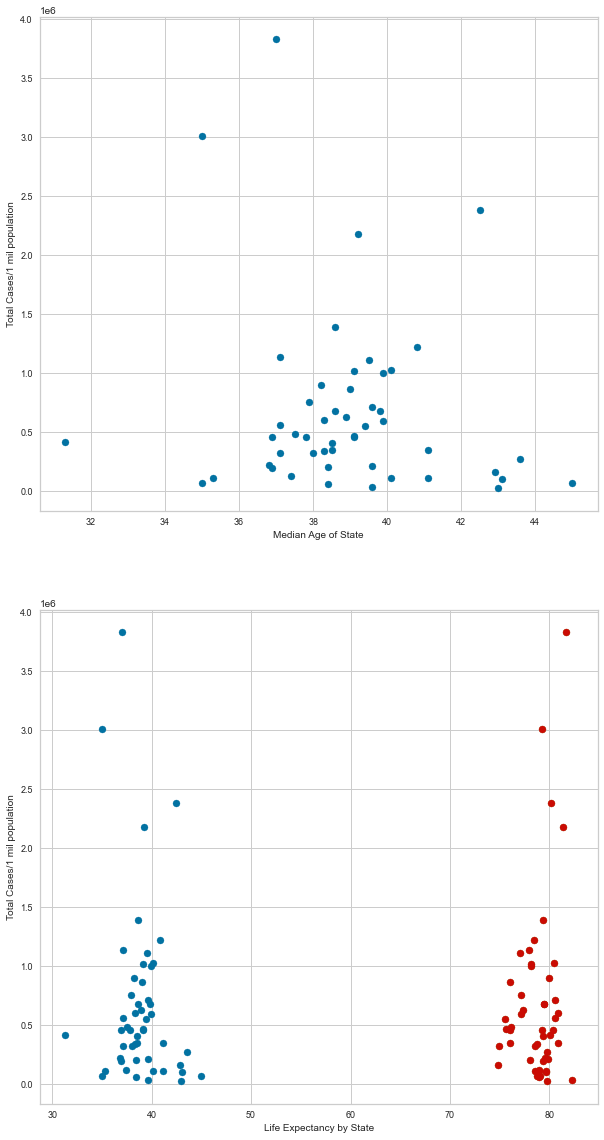

In [29]:
plt.rcParams['figure.figsize'] = (10, 20)

#Axes fix
fig, axes = plt.subplots(nrows=2, ncols=1)
for idx, ax in enumerate(axes):
    ax.scatter(df[num_features[idx]], df['Total Cases'])
    ax.set_xlabel(num_features[idx], fontsize=10)
    ax.set_ylabel('Total Cases/1 mil population', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
    plt.scatter(df[num_features[idx]], df['Total Cases'])

Neither seem to have that great of a correlational value, however Life Expectancy seems to be very awry. At this time, I believe we can drop that feature from the dataset.

In [30]:
df=df.drop('Life Expectancy by State', axis=1)

In [31]:
#Let's now take the time to change our categorical data over to values
cat_features = ['State Restrictions', 'Governor Affiliation']
data_cat = df[cat_features]
data_cat = data_cat.replace({'State Restrictions': {'Lifted many restrictions, or never enacted major restrictions': 1, 'Some restrictions': 2, 'Comprehensive restrictions on business and travel': 3}, 'Governor Affiliation':{'Republican': 0, 'Democratic': 1}})
df['State Restrictions']=data_cat['State Restrictions']
df['Governor Affiliation']=data_cat['Governor Affiliation']

Now let's check the correlations of the categorical variables for relevance, this time with statistical checking via the Pearson coefficient of correlation.

In [32]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [33]:
corr, _ = pearsonr(df['State Restrictions'], df['Total Cases/1 mil population'])
print(corr)
corr, _ = pearsonr(df['Governor Affiliation'], df['Total Cases/1 mil population'])
print(corr)

-0.5139176885705462
-0.08114414244240062


Looks like State Restrictions increasing did actually lower the number of total cases!

MILESTONE 3: Apply A Model to your dataset, evaluate its efficiency, and explain why you used it.

The first thing that comes to mind in deciding on models is what we are attempting to have as an outcome: quantitative or qualitative (classification). In these terms, the dependent variable we'll be modeling against will be number of total cases/1 mil population. As such, our dependent variable will be quantitative, so regression models are likely a good option. Further, since it is indiscrete, logistic regression is out. Given that we have multiple independents, let's start by trying out a multiple linear regression model. First we need to split our data into training and test sets.

In [34]:
#import important packages
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [35]:
#separate into sets
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [36]:
#set our independent and dependent variables
X_Train = train[['State Restrictions','Median Age of State', 'Governor Affiliation']]
Y_Train = train[['Total Cases/1 mil population']]

In [37]:
#Build up the model
regr = linear_model.LinearRegression()

In [38]:
#Get that fit
regr.fit(X_Train, Y_Train)

LinearRegression()

In [39]:
Y_test_preds=regr.predict(test[['State Restrictions','Median Age of State', 'Governor Affiliation']])

In [40]:
Y_test_preds

array([[115561.77445538],
       [101744.08152907],
       [ 84871.47981823],
       [ 98546.42631605],
       [117046.39740715],
       [108509.81543444],
       [113249.90940535],
       [101001.77005318],
       [111107.90560005],
       [ 82273.38965262]])

Alrighty, let's check out how well our predictions were, we'll do a few different methods here

In [41]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(test[['Total Cases/1 mil population']], Y_test_preds)))
from sklearn.metrics import r2_score
print(r2_score(test[['Total Cases/1 mil population']],Y_test_preds))

11189.835822661425
0.3497169448258044


Evaluating that on its own, that's about a 12% error in cases/1mil, which is not amazing, but not crazy horrible either. From this we can perhaps discern that state restrictions, governor affiliation, and age as a combination aren't bad indicators with relation to total cases/1 mil population, but they aren't dramatically precise.

MILESTONE 4: TRY A DIFFERENT MODEL ON SAME DATASET AND COMPARE TO SEE IF YOU CAN GET A BETTER MODELING SITUATION

One matrix I'd like to see if cutting the fat out of the multiple regression analysis and coming back down to a single input single output situation to see if that tracks better. In our previous review of statistical outputs, we saw that the most major influencer of the cases/1 mil pop was found to be state restrictions. Let's give a single linear regression for that model a whirl.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
#set our independent and dependent variables
X_Train2 = train[['State Restrictions']]
Y_Train2 = train[['Total Cases/1 mil population']]

In [44]:
#model creation
regr2=LinearRegression()
regr2.fit(X_Train2, Y_Train2)

LinearRegression()

In [45]:
#predictions
Y_test_pred2=regr2.predict(test[['State Restrictions']])

In [46]:
#root mean squared error
print(np.sqrt(mean_squared_error(test[['Total Cases/1 mil population']], Y_test_pred2)))
print(r2_score(test[['Total Cases/1 mil population']],Y_test_pred2))

11254.513172363966
0.3421779362597449


Pretty interesting there, looks like those addt'l features did actually improve the modeling; let's see if either of them alone really amped up the accuracy or if it ends up overfitting

In [47]:
X_Train3 = train[['Median Age of State']]
Y_Train3 = train[['Total Cases/1 mil population']]

In [48]:
regr3=LinearRegression()
regr3.fit(X_Train3, Y_Train3)

LinearRegression()

In [49]:
Y_test_pred3=regr3.predict(test[['Median Age of State']])

In [50]:
print(np.sqrt(mean_squared_error(test[['Total Cases/1 mil population']], Y_test_pred3)))
print(r2_score(test[['Total Cases/1 mil population']],Y_test_pred3))

14535.628021704411
-0.09729300144459074


That one looks worse there, let's try our last case as well

In [51]:
X_Train4 = train[['Governor Affiliation']]
Y_Train4 = train[['Total Cases/1 mil population']]

In [52]:
regr4=LinearRegression()
regr4.fit(X_Train4, Y_Train4)

LinearRegression()

In [53]:
Y_test_pred4=regr4.predict(test[['Governor Affiliation']])

In [54]:
print(np.sqrt(mean_squared_error(test[['Total Cases/1 mil population']], Y_test_pred4)))
print(r2_score(test[['Total Cases/1 mil population']],Y_test_pred4))

13633.18509927786
0.03472808431004737


Looks like the alternative single linear regressions do not yield addt'l accuracy when predicting COVID cases/1mil pop which can indicate that neither governor affiliation nor age of state are better indicators of COVID cases, instead it once again drives home that state restrictions seemed to assist in lowering the total number of cases per 1 million inhabitatns in the States.